# NLM data exploration
by Laura Bartlett and In Hye Cho

_**Introduction**_

The National Library of Medicine (NLM) produces a resource named HealthReach (http://healthreach.nlm.nih.gov) that provides access to free low literacy, mulitlingual health information to be used by healthcare providers with patients/clients. NLM collects the materials and indexes with controlled vocabulary.

Users can access the HealthReach collection through the website but our interest is to make our collection only available through an application programming interface (API). We curently have a closed API that we share with another NLM resource, and a hospital in Kenya that is pulling English, French, and Swahili materials into their patient electronic health records (EHR). The HealthReach program manager wants everyone to be able to pull the exact materials they want (determined by metadata) and use as they need it, when they need it, and where they need it. 

_**Statement of Need**_

The majority of our users are in the healthcare service field and do not feel they are "savvy" in technology. Therefore dicussions of APIs and data often stall conversations about how they can customize the use of the HealthReach data. This is unfortunate as the true strength of the collection would be at point of need in the EHR...not stored in a web database that must be accessed, searched, and retrieved. 

To make our current users more comfortable with thinking about the multilingual collection of HealthReach as "data," we created a visualization of the collection in Tableau https://healthreach.nlm.nih.gov/data-viz. To create the visualizations in Tableau the progammer and program manager have to put in siginificant effort into accurately determining, combining, and displaying the data. The data is extracted directly from the database and users are provided .csv files of the data under an "accessibility" section. The program manager is responsible for checking the Tableau displays to ensure the "numbers" are correct. This is not inconsequential - not only does the program manager not want to do this, but the data that is displayed cannot easily be checked from the .csv because some "massaging" of the data has been done, and the data changes over time. For all of its transparency faults and diffculty in creating, Tableau provides an interactive and approachable interface for low-data literacy consumers.

To best serve the ~~lazy~~ program manager, we will use Python to automate a task she doesn't want to do - check the "numbers" in the visualization. 

_**Demonstration**_

In this presentation we will replicate one visualization on the HealthReach Tableau.

To begin, we pulled data from the HealthReach database and exported to an common-seperated value (.CSV) spreadsheet. We will use this data taken on Novermeber 28, 2018 for our visualization:

https://github.com/BIOF309/final-project-nlm/blob/master/HealthReach_Data_11_28_2018.csv

We can view our the .CSV file, but that is a alot of data for a non-programmer to view. We have over 8,000 rows and 21 columns. We will use **Python for data anyalsis** or **pandas** for short. 

Let us begin by importing **pandas** so we can use it for our visualizations.

In [3]:
#import pandas as pd
import pandas as pd

Next we will bring in our data from our .csv sheet. First we need to download our .csv. 

In [4]:
#download .csv
url = 'https://raw.githubusercontent.com/BIOF309/final-project-nlm/master/HealthReach_Data_11_28_2018.csv'

We need to tell pandas to read our .csv. We will create a dataframe named df1. 

In [5]:
df1 = pd.read_csv(url)

Now our .csv file is loaded and ready to display our .csv data in this Juypter Notebook

In [6]:
df1

,Group ID,Keyword,M+ Health Topic,Title,Resource Properties Page URL,Author,Country of Origin,Medical Reviewer,Other Reviewer,Development Method,...,Community Participation,Copyright,Last Reviewed by Author(s),Record Last Updated,Document ID,Parent Document ID,Language,Material URL,Format,File Type
0,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,1,0,English,https://healthreach.nlm.nih.gov/files/English_...,Document,PDF
1,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,2,1,Amharic,https://healthreach.nlm.nih.gov/files/Amharic_...,Document,PDF
2,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,3,1,Arabic,https://healthreach.nlm.nih.gov/files/Arabic_S...,Document,PDF
3,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,4,1,Dzongkha,https://healthreach.nlm.nih.gov/files/Bhutanes...,Document,PDF
4,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,5,1,Burmese,https://healthreach.nlm.nih.gov/files/Burmese_...,Document,PDF
5,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,6,1,Dari,https://healthreach.nlm.nih.gov/files/Dari_Saf...,Document,PDF
6,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,7,1,Farsi,https://healthreach.nlm.nih.gov/files/Farsi_Sa...,Document,PDF
7,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,8,1,Hakha Chin,https://healthreach.nlm.nih.gov/files/HakhaChi...,Document,PDF
8,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,9,1,Karen,https://healthreach.nlm.nih.gov/files/Karen_Sa...,Document,PDF
9,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,N

Now that we have our data loaded, let's answer a question!

*How many items are in each "Format" in HealthReach?*
This question can be answered with one column of data. We have a metadata field "Format" which has 3 options:
- Document
- Audio
- Video

To answer this question we need to see what rows assigned the controlled vocabulary term (docuemnt, audio, or video) in the metadata column "Format," and display our results showing the 3 options. 

For this I am choosing to display in a pie chart. Let's begin by calculating the number of rows associated with the vocabulary assigned:

In [7]:
import numpy as np

In [8]:
#Code borrowed from "basic pieplot with pandas" by Python graph gallery
#import matplotlib
#import matplotlib as plt

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [11]:
#download .csv
url = 'https://raw.githubusercontent.com/BIOF309/final-project-nlm/master/HealthReach_Data_11_28_2018.csv'

In [12]:
df=pd.read_csv(url)
df

,Group ID,Keyword,M+ Health Topic,Title,Resource Properties Page URL,Author,Country of Origin,Medical Reviewer,Other Reviewer,Development Method,...,Community Participation,Copyright,Last Reviewed by Author(s),Record Last Updated,Document ID,Parent Document ID,Language,Material URL,Format,File Type
0,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,1,0,English,https://healthreach.nlm.nih.gov/files/English_...,Document,PDF
1,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,2,1,Amharic,https://healthreach.nlm.nih.gov/files/Amharic_...,Document,PDF
2,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,3,1,Arabic,https://healthreach.nlm.nih.gov/files/Arabic_S...,Document,PDF
3,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,4,1,Dzongkha,https://healthreach.nlm.nih.gov/files/Bhutanes...,Document,PDF
4,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,5,1,Burmese,https://healthreach.nlm.nih.gov/files/Burmese_...,Document,PDF
5,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,6,1,Dari,https://healthreach.nlm.nih.gov/files/Dari_Saf...,Document,PDF
6,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,7,1,Farsi,https://healthreach.nlm.nih.gov/files/Farsi_Sa...,Document,PDF
7,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,8,1,Hakha Chin,https://healthreach.nlm.nih.gov/files/HakhaChi...,Document,PDF
8,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,9,1,Karen,https://healthreach.nlm.nih.gov/files/Karen_Sa...,Document,PDF
9,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,N

In [13]:
#Determine the count of rows for each option in Format column
df2 = df1.set_index(['Format'])

df_video_size = len(df2.loc['Video'])
df_doc_size = len(df2.loc['Document'])
df_audio_size = len(df2.loc['Audio'])


print('doc: {}'.format(df_doc_size))

print('video: {}'.format(df_video_size))

print('audio: {}'.format(df_video_size)) 


doc: 6533
video: 1143
audio: 1143


In [14]:
#1.	here is an example of picking a subset of data
#df[df.Format=='Audio'][df.Language=='English']
#please notice the == 
#2.	To get the count for each format:


#AudioCount = len(df[df.Format=='Audio'])
#VideoCount = len(df[df.Format=='Video'])
#DocCount = len(df[df.Format=='Document'])
#print(AudioCount)
#print(VideoCount)
#print(DocCount)


In [15]:
#Check to make sure numbers are accurate
print (6533+1143+1143)

8819


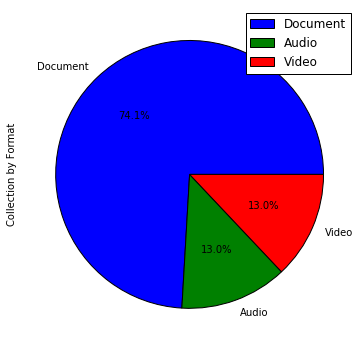

In [5]:
#create pie chart
#Code borrowed from "basic pieplot with pandas" by Python graph gallery
# --- dataset 1: just 3 values for 3 groups: 


df = pd.DataFrame([6533,1143,1143], index=['Document', 'Audio', 'Video'], columns=['Collection by Format']) 

# make the plot 
df.plot(kind='pie', autopct='%.1f%%', subplots=True, figsize=(6, 6));



Try to replicate the word cloud.....

In the meantime, let's identify the number of unique languages by cleaning and analyzing the language column.

In [6]:
#Starting from the beginning, import pandas as pd
import pandas as pd
#Also import numpy as np
import numpy as np

In [7]:
#download the raw data .csv file and save as 'url'
url = 'https://raw.githubusercontent.com/BIOF309/final-project-nlm/master/HealthReach_Data_11_28_2018.csv'

In [8]:
#Create a dataframe of the raw data in the .csv file and name it df2:
df2= pd.read_csv(url)

In [9]:
#Create a new dataframe of the Language column as 'dflang':
dflang = pd.DataFrame(df2,columns=['Language'])
print (dflang)

                                             Language
0                                             English
1                                             Amharic
2                                              Arabic
3                                            Dzongkha
4                                             Burmese
5                                                Dari
6                                               Farsi
7                                          Hakha Chin
8                                               Karen
9                                         Kinyarwanda
10                                            Kirundi
11                                             Nepali
12                                             Somali
13                                            Swahili
14                                           Tigrinya
15                                            Turkish
16                                            English
17                          

In [10]:
dflang['Language'].value_counts()

English                                                     745
Spanish                                                     585
Russian                                                     370
Chinese, Traditional (Cantonese dialect)                    335
English; Spanish                                            315
Chinese, Simplified (Mandarin dialect)                      311
English; Somali                                             282
English; French                                             275
English; Russian                                            274
English; Japanese                                           266
Korean                                                      259
English; Korean                                             251
English; Chinese, Simplified (Mandarin dialect)             246
Somali                                                      238
English; Arabic                                             237
Japanese                                

In [11]:
#Glancing at dflang, many of the rows are duplicates and there are multiple languages in one row.
#We have some cleaning to do.
#First, let's drop the duplicates to get an initial sense of how many unique languages there could be:
print (dflang.drop_duplicates())

                                               Language
0                                               English
1                                               Amharic
2                                                Arabic
3                                              Dzongkha
4                                               Burmese
5                                                  Dari
6                                                 Farsi
7                                            Hakha Chin
8                                                 Karen
9                                           Kinyarwanda
10                                              Kirundi
11                                               Nepali
12                                               Somali
13                                              Swahili
14                                             Tigrinya
15                                              Turkish
255                                     English;

In [12]:
#We're down to 93 rows, but there are multiple languages in one row. 

#Let's separate the multiple languages in a row into individual rows and call this new series 's'.
#Code borrowed from: https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows

import pandas as pd
s = dflang['Language'].str.split(';').apply (pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
print(s)

#Note: The numbers below are the index, not the frequency of language occurence

0                                       English
1                                       Amharic
2                                        Arabic
3                                      Dzongkha
4                                       Burmese
5                                          Dari
6                                         Farsi
7                                    Hakha Chin
8                                         Karen
9                                   Kinyarwanda
10                                      Kirundi
11                                       Nepali
12                                       Somali
13                                      Swahili
14                                     Tigrinya
15                                      Turkish
16                                      English
17                                      Amharic
18                                       Arabic
19                                     Dzongkha
20                                      

In [13]:
#Drop duplicates in series 's'
#Code borrowed from: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.drop_duplicates.html

s.drop_duplicates()

0                                         English
1                                         Amharic
2                                          Arabic
3                                        Dzongkha
4                                         Burmese
5                                            Dari
6                                           Farsi
7                                      Hakha Chin
8                                           Karen
9                                     Kinyarwanda
10                                        Kirundi
11                                         Nepali
12                                         Somali
13                                        Swahili
14                                       Tigrinya
15                                        Turkish
255                                        Arabic
865                                       Spanish
877                                       Russian
985       Modern Standard Arabic (Arabic dialect)


In [14]:
#The Length is 88 but the public HealthReach website lists 61 unique languages as of 12/1/2018.
#Public HealthReach website: https://healthreach.nlm.nih.gov/data-viz

#Need to investigate inconsistency further.
#Let's look at the actual strings and print.

print(pd.unique(s))

['English' 'Amharic' 'Arabic' 'Dzongkha' 'Burmese' 'Dari' 'Farsi'
 'Hakha Chin' 'Karen' 'Kinyarwanda' 'Kirundi' 'Nepali' 'Somali' 'Swahili'
 'Tigrinya' 'Turkish' ' Arabic' 'Spanish' 'Russian'
 'Modern Standard Arabic (Arabic dialect)'
 'Chinese, Simplified (Mandarin dialect)' 'French' 'Vietnamese'
 ' Japanese' 'Bosnian' 'Chinese, Traditional (Cantonese dialect)'
 'Haitian Creole' 'Hmong' 'Japanese' 'Korean' 'Portuguese' 'Tagalog'
 'Tongan ' 'Pashto' 'Oromo' 'Khmer' 'Gujarati' 'Hindi' 'Lao' 'Urdu'
 'Kurdish' 'Armenian' 'Serbo-Croatian' 'Ukrainian' 'Thai' 'Tibetan'
 'Sudanese (Arabic dialect)' 'Levantine (Arabic dialect)' 'Bengali'
 'German' 'Italian' ' Nepali' ' Swahili' 'Malay' 'Indonesian' 'Polish'
 'Chuukese' 'Ilocano' 'Marshallese' 'Punjabi' ' Korean' ' Portuguese'
 ' Chinese, Traditional (Cantonese dialect)' ' Ukrainian'
 ' Chinese, Simplified (Mandarin dialect)' ' Somali' ' Russian' ' French'
 ' Marshallese' ' Bosnian' ' Hindi' ' Tagalog' ' Vietnamese' ' Spanish'
 ' Khmer' ' Kirun

In [15]:
#It looks like there are leading and trailing spaces that are causing languages to appear more than once (e.g. 'English' & ' English').

#Let's strip the leading and trailing spaces and call the new data series 's2' and print

s2 = s.str.strip()
print(s2)

0                                      English
1                                      Amharic
2                                       Arabic
3                                     Dzongkha
4                                      Burmese
5                                         Dari
6                                        Farsi
7                                   Hakha Chin
8                                        Karen
9                                  Kinyarwanda
10                                     Kirundi
11                                      Nepali
12                                      Somali
13                                     Swahili
14                                    Tigrinya
15                                     Turkish
16                                     English
17                                     Amharic
18                                      Arabic
19                                    Dzongkha
20                                     Burmese
21           

In [16]:
#Lets drop the duplicates from s2 to get unique languages and call it 's3' and print.

s3 = s2.drop_duplicates()
print(s3)

0                                        English
1                                        Amharic
2                                         Arabic
3                                       Dzongkha
4                                        Burmese
5                                           Dari
6                                          Farsi
7                                     Hakha Chin
8                                          Karen
9                                    Kinyarwanda
10                                       Kirundi
11                                        Nepali
12                                        Somali
13                                       Swahili
14                                      Tigrinya
15                                       Turkish
865                                      Spanish
877                                      Russian
985      Modern Standard Arabic (Arabic dialect)
986       Chinese, Simplified (Mandarin dialect)
987                 

In [17]:
#Yay! After dropping the duplicates, the Length = 61 which is the number of languages listed on the public HealthReach website.

#Count the number of unique rows in s3 to verify the final count

len(s3)

61

In [18]:
#For a clean, ordered list, print the distinct languages in ascending alphabetic order

print(s3.sort_values(ascending=True))

#Note: The numbers below are the index, not the frequency of language occurence

5923                                    Albanian
1                                        Amharic
2                                         Arabic
1827                                    Armenian
2455                                     Bengali
1149                                     Bosnian
4                                        Burmese
6480                         Cape Verdean Creole
986       Chinese, Simplified (Mandarin dialect)
1444    Chinese, Traditional (Cantonese dialect)
2935                                    Chuukese
5                                           Dari
3                                       Dzongkha
0                                        English
6                                          Farsi
987                                       French
2524                                      German
1798                                    Gujarati
1445                              Haitian Creole
7                                     Hakha Chin
1799                

Back to trying to replicate the language word cloud. For now, I'll use the **s2 data series** above in as the data for the word cloud and other visualizations since it **lists every instance of every language used in the .csv file** on a separate row.
- The HealthReach webpage counts the number of **Titles** for the word cloud, which is **not enumerated in s2 data**.
- Cleaning the data to isolate the number of titles by language is beyond what I can do right now because the Title needs to be duplicated for each language that is separated into its own row when grouped with other languages in the Language column (e.g. English, Arabic).
- It would be great to duplicate the Format for each language also for further analysis and visualization of the data.


After trying the word cloud without much progress, this section will be on creating a horizontal bar graph of the languages using the s2 data series above. 
- The numbers and language order in the bar graph here are **not** the same as the HealthReach data since the raw data differs for each.

In [19]:
#Convert data series s2 to a dataframe with column name 'Language'
dflang2 = pd.DataFrame(s2).reset_index()
dflang2.columns=['Index','Language']
dflang2

,Index,Language
0,0,English
1,1,Amharic
2,2,Arabic
3,3,Dzongkha
4,4,Burmese
5,5,Dari
6,6,Farsi
7,7,Hakha Chin
8,8,Karen
9,9,Kinyarwanda


In [20]:
#Count the instance of each distinct language in the 'Language' column
s4 = dflang2['Language'].value_counts()
s4

English                                     3905
Spanish                                      900
Russian                                      646
Chinese, Simplified (Mandarin dialect)       558
Chinese, Traditional (Cantonese dialect)     533
Somali                                       530
Korean                                       510
Japanese                                     488
Arabic                                       449
French                                       390
Vietnamese                                   279
Hindi                                        253
Nepali                                       228
Farsi                                        158
Burmese                                      157
Karen                                        151
Ukrainian                                    137
Amharic                                      127
Swahili                                      122
Kinyarwanda                                  117
Bosnian             

In [37]:
#Import python packages (numpy, pandas, matplotlib, pillow, and wordcloud) to create word cloud and bar graph.
#https://www.datacamp.com/community/tutorials/wordcloud-python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
from os import path
from PIL import Image
#pip install wordcloud
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import pillow as pillow



In [38]:
#Convert s4 data into dataframe to clean up for bar graph.
dflang3 = pd.DataFrame(s4).reset_index()
dflang3.columns=['Language','Occurrence'] #Added column headers. Used 'Occurrence' instead of 'Count' since Count could be mistaken for Title Count.
dflang3

,Language,Occurrence
0,English,3905
1,Spanish,900
2,Russian,646
3,"Chinese, Simplified (Mandarin dialect)",558
4,"Chinese, Traditional (Cantonese dialect)",533
5,Somali,530
6,Korean,510
7,Japanese,488
8,Arabic,449
9,French,390


In [39]:
#Keep only the top 11 languages
#Code borrowed from: https://erikrood.com/Python_References/dropping_rows_cols_pandas.html
dflang3.drop(dflang3.index [11:], inplace=True)
dflang3

#I couldn't get it to drop English and everything after 10 simultaneously (e.g. [0, 11:] didn't work)

,Language,Occurrence
0,English,3905
1,Spanish,900
2,Russian,646
3,"Chinese, Simplified (Mandarin dialect)",558
4,"Chinese, Traditional (Cantonese dialect)",533
5,Somali,530
6,Korean,510
7,Japanese,488
8,Arabic,449
9,French,390


In [40]:
#Drop English since we want top 10 non-English languages
dflang3.drop(dflang3.index[0], inplace=True)
dflang3

,Language,Occurrence
1,Spanish,900
2,Russian,646
3,"Chinese, Simplified (Mandarin dialect)",558
4,"Chinese, Traditional (Cantonese dialect)",533
5,Somali,530
6,Korean,510
7,Japanese,488
8,Arabic,449
9,French,390
10,Vietnamese,279


In [41]:
#Reverse the order of the rows in dataframe
#Code borrowed from: https://stackoverflow.com/questions/39127900/how-to-reverse-the-order-of-rows-in-my-dataframe-using-python-but-not-reverse-t
dflang4 = dflang3.iloc[::-1]
dflang4

#I didn't touch the index, which gave me the result I wanted.

,Language,Occurrence
10,Vietnamese,279
9,French,390
8,Arabic,449
7,Japanese,488
6,Korean,510
5,Somali,530
4,"Chinese, Traditional (Cantonese dialect)",533
3,"Chinese, Simplified (Mandarin dialect)",558
2,Russian,646
1,Spanish,900


In [42]:
#Drop Index Column from dataframe
#Code borrowed from: https://stackoverflow.com/questions/37351172/how-to-remove-index-from-a-created-dataframe-in-python
dflang4.set_index('Language', inplace=True)
dflang4

,Occurrence
Language,
Vietnamese,279
French,390
Arabic,449
Japanese,488
Korean,510
Somali,530
"Chinese, Traditional (Cantonese dialect)",533
"Chinese, Simplified (Mandarin dialect)",558
Russian,646


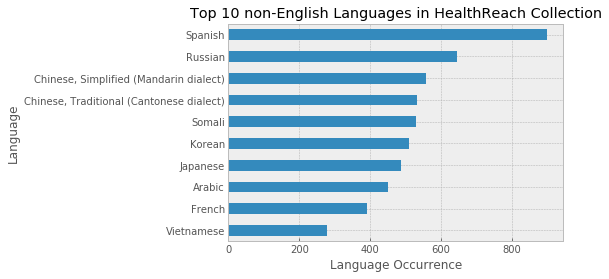

In [65]:
#Create a horizontal bar chart of the top 10 languages
ax=dflang4.plot(kind='barh')
ax.set_xlabel('Language Occurrence')
ax.set_title('Top 10 non-English Languages in HealthReach Collection')

#Remove the legend
ax.get_legend().remove()

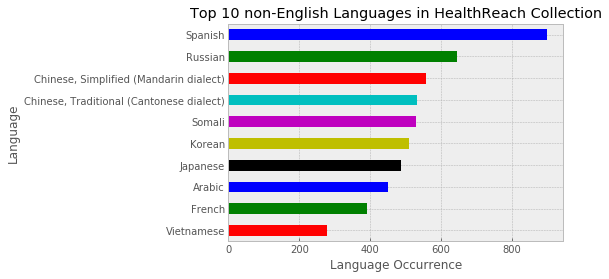

In [67]:
#Let's try changing the color of each bar
#Use multiple colors for the bars in the graph
#Code borrowed from: https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python

my_colors = 'rgbkymc'  #red, green, blue, black, etc.

ax=dflang4.plot(kind='barh', color=my_colors)
ax.set_xlabel('Language Occurrence')
ax.set_title('Top 10 non-English Languages in HealthReach Collection')


#Use 10 different colors not just 7
#my colors = ['r','g,'b','k','y','m','c','maroon','darkorange','hotpink']  

#Adding more than 7 colors isn't working
#Perhaps keeping it monochromatic is best anyway.

#Remove the legend
ax.get_legend().remove()

**Reminder:** The numbers and language order in the bar graph here are **not** the same as the HealthReach data since the raw data differs for each. HealthReach data uses Titles and the Occurrence here is the occurrence of each language after being parsed into individual rows. Duplicate titles for languages exist in the raw data for this bar graph, so numbers here are likely to be higher than on the HealthReach website.

In [44]:
#To make graphs interactive, import plotly but I get an error right now.

#import plotly.plotly as py
#import plotly.tools as tls
